## Overview

## Setup

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.6.0


Define model

In [2]:
model_path = 'base_tflite.tflite'
model_path = 'pruned_tflite_x3.tflite'
model_path = 'quantized_and_pruned_tflite_file_x10.tflite'
model_path = 'at_quantized_tflite_model.tflite'
model_path = 'post_quantized_tflite_model.tflite'
model_path = 'pruned_and_clustered_tflite_file.tflite'


Define a test image.

In [3]:
test_img_path = "PetImages/Cat/6779.jpg"
#test_img_path = "PetImages/Cat/38.jpg"

## Generate a super resolution image using TensorFlow Lite

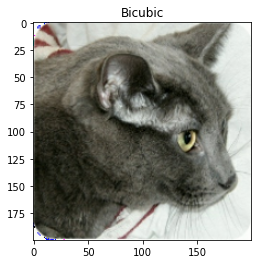

In [4]:
lr = tf.io.read_file(test_img_path)
lr = tf.image.decode_jpeg(lr)

lr = tf.image.resize(
    lr, [180,180], method=tf.image.ResizeMethod.BICUBIC, preserve_aspect_ratio=False,
    antialias=False, name=None
)

lr = tf.expand_dims(lr, axis=0)
lr = tf.cast(lr, tf.float32)

lr_b = tf.cast(tf.squeeze(lr, axis=0), tf.uint8)
bicubic = tf.image.resize(lr_b, [200, 200], tf.image.ResizeMethod.BICUBIC)
bicubic = tf.cast(bicubic, tf.uint8)

plt.title('Bicubic')
plt.imshow(bicubic.numpy());

lr = lr/255

In [5]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Run the model
interpreter.set_tensor(input_details[0]['index'], lr)
interpreter.invoke()

# Extract the output and postprocess it
predictions = interpreter.get_tensor(output_details[0]['index'])


score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

This image is 99.99 percent cat and 0.01 percent dog.


In [6]:
#This image is 91.12 percent cat and 8.88 percent dog.
#This image is 93.18 percent cat and 6.82 percent dog.
#This image is 94.75 percent cat and 5.25 percent dog.
#This image is 100.00 percent cat and 0.00 percent dog.
#This image is 92.58 percent cat and 7.42 percent dog.
#This image is 99.99 percent cat and 0.01 percent dog.